# Final Project 

## See emailed powerpoint for  proposal, brief, approach etc. 

#### Organization
- Data Cleaning
- Variable Selection
- Modeling
- SARIMA


## Packages

In [1]:
#Packages to use
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
color = sns.color_palette()
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#ignore annoying warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

#Limits floats to 3 decimals
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

## DATA

In [81]:
url = 'C:/Users/James.Kelly/OneDrive - insidemedia.net/Documents/final_project_data.csv'
df = pd.read_csv(url, index_col='Week', parse_dates=True)
df['quarter'] = df.index.quarter
df['month'] = df.index.month

df.head()

Stock  Category_SPEND  Category_GRP  BDC_SPEND  BDC_GRP  \
Week                                                                    
2017-01-01 1476.910            9382           389          0        0   
2017-01-08 1518.000           14874           612          0        0   
2017-01-15 1544.000           14780           694          0        0   
2017-01-22 1541.470           13325           604          0        0   
2017-01-29 1598.650           18675           655          0        0   

            BDC_SOS  BDC_SOV  Google_index  Twitter_mentions  \
Week                                                           
2017-01-01    0.000    0.000            57               529   
2017-01-08    0.000    0.000            54               594   
2017-01-15    0.000    0.000            56               653   
2017-01-22    0.000    0.000            54               597   
2017-01-29    0.000    0.000            56               536   

            Twitter_sentiment  ...  Ad_awareness   WOM  Consideration  \
Week                           ...                                      
2017-01-01             -0.729  ...         4.842 1.389          8.801   
2017-01-08              0.963  ...         5.723 1.696          8.860   
2017-01-15              3.597  ...         5.294 1.333          9.254   
2017-01-22              1.554  ...         5.722 2.334         11.312   
2017-01-29              2.107  ...         5.404 3.405          9.966   

            Purchase_Intent  Recent_users  Article_Count  Article_Engagement  \
Week                                                                           
2017-01-01            2.395         3.502             89               4.718   
2017-01-08            2.461         3.187             70               0.000   
2017-01-15            0.845         1.296             69               4.812   
2017-01-22            2.813         4.933             69               5.935   
2017-01-29            2.224         2.793              4               0.693   

            Article_Sentiment  quarter  month  
Week                                           
2017-01-01              4.235        1      1  
2017-01-08              4.869        1      1  
2017-01-15              7.945        1      1  
2017-01-22              6.864        1      1  
2017-01-29              4.340        1      1  

[5 rows x 35 columns]

In [30]:
df.isnull().sum().sum()

0

In [48]:
#df['Stock'] = df[['Stock', 'BDC_SOS', 'BDC_SOV']].astype(float)
df.dtypes

Stock                 float64
Category_SPEND          int64
Category_GRP            int64
BDC_SPEND               int64
BDC_GRP                 int64
BDC_SOS               float64
BDC_SOV               float64
Google_index            int64
Twitter_mentions        int64
Twitter_sentiment     float64
Twitter_Anger           int64
Twitter_Fear            int64
Twitter_Disgust         int64
Twitter_Joy             int64
Twitter_Surprise        int64
Twitter_Sadness         int64
Buzz                  float64
Attention             float64
Impression            float64
Quality               float64
Value                 float64
Reputation            float64
Satisfaction          float64
Recommend             float64
Awareness             float64
Ad_awareness          float64
WOM                   float64
Consideration         float64
Purchase_Intent       float64
Recent_users          float64
Article_Count           int64
Article_Engagement    float64
Article_Sentiment     float64
quarter   

# Variable Selection
### Correlations

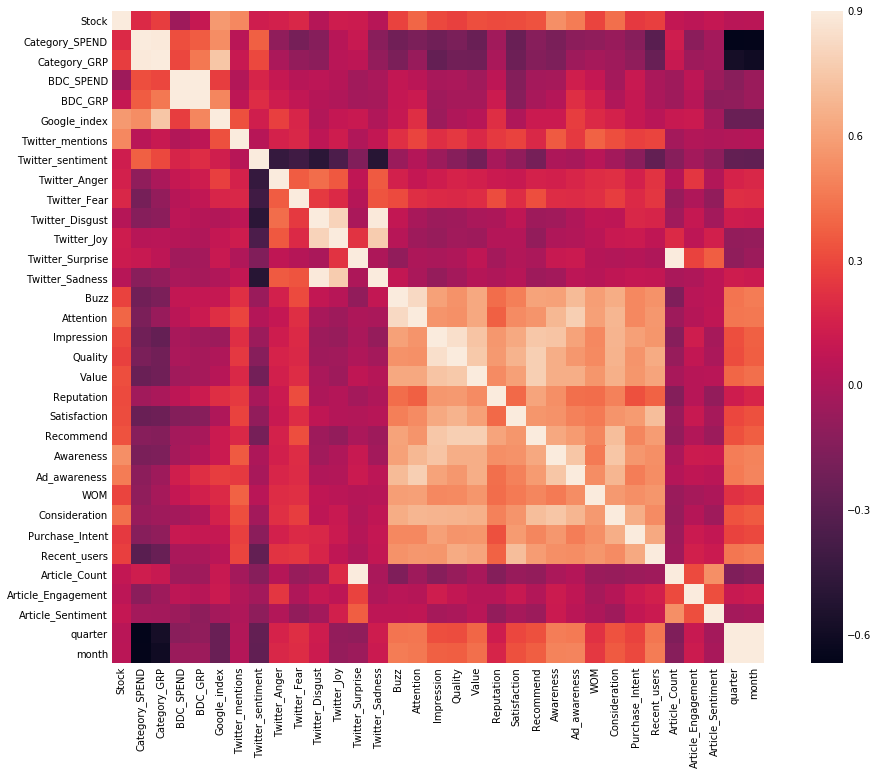

In [31]:
corrmat = df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Variable Selection
### Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [82]:
# create x and y columns
X = df.loc[:, df.columns != 'Consideration']
y = df['Consideration']
# create dummy variables
#X = pd.get_dummies(X)

In [62]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
importances = pd.DataFrame({
    'Features': X.columns,
    'Importance': rf.feature_importances_
})

importances.sort_values(by=['Importance'],ascending=False)

Features  Importance
24           Awareness       0.155
18          Impression       0.139
23           Recommend       0.096
25        Ad_awareness       0.083
17           Attention       0.077
19             Quality       0.061
27     Purchase_Intent       0.057
26                 WOM       0.052
20               Value       0.050
16                Buzz       0.034
10       Twitter_Anger       0.018
3            BDC_SPEND       0.015
12     Twitter_Disgust       0.013
30  Article_Engagement       0.012
0                Stock       0.012
22        Satisfaction       0.012
21          Reputation       0.010
15     Twitter_Sadness       0.010
8     Twitter_mentions       0.009
9    Twitter_sentiment       0.009
31   Article_Sentiment       0.008
29       Article_Count       0.007
6              BDC_SOV       0.007
13         Twitter_Joy       0.006
2         Category_GRP       0.006
1       Category_SPEND       0.006
4              BDC_GRP       0.006
5              BDC_SOS       0.006
14    Twitter_Surprise       0.005
11        Twitter_Fear       0.005
7         Google_index       0.005
33               month       0.004
28        Recent_users       0.004
32             quarter       0.000

# Variable Selection
### Hierarchical Clustering & Dendrograms


In [68]:
vals_to_keep = importances['Features'][:33].values.tolist()

In [69]:
# standardize data
data_for_cluster = (X[vals_to_keep] - X[vals_to_keep].mean()) / X[vals_to_keep].std()

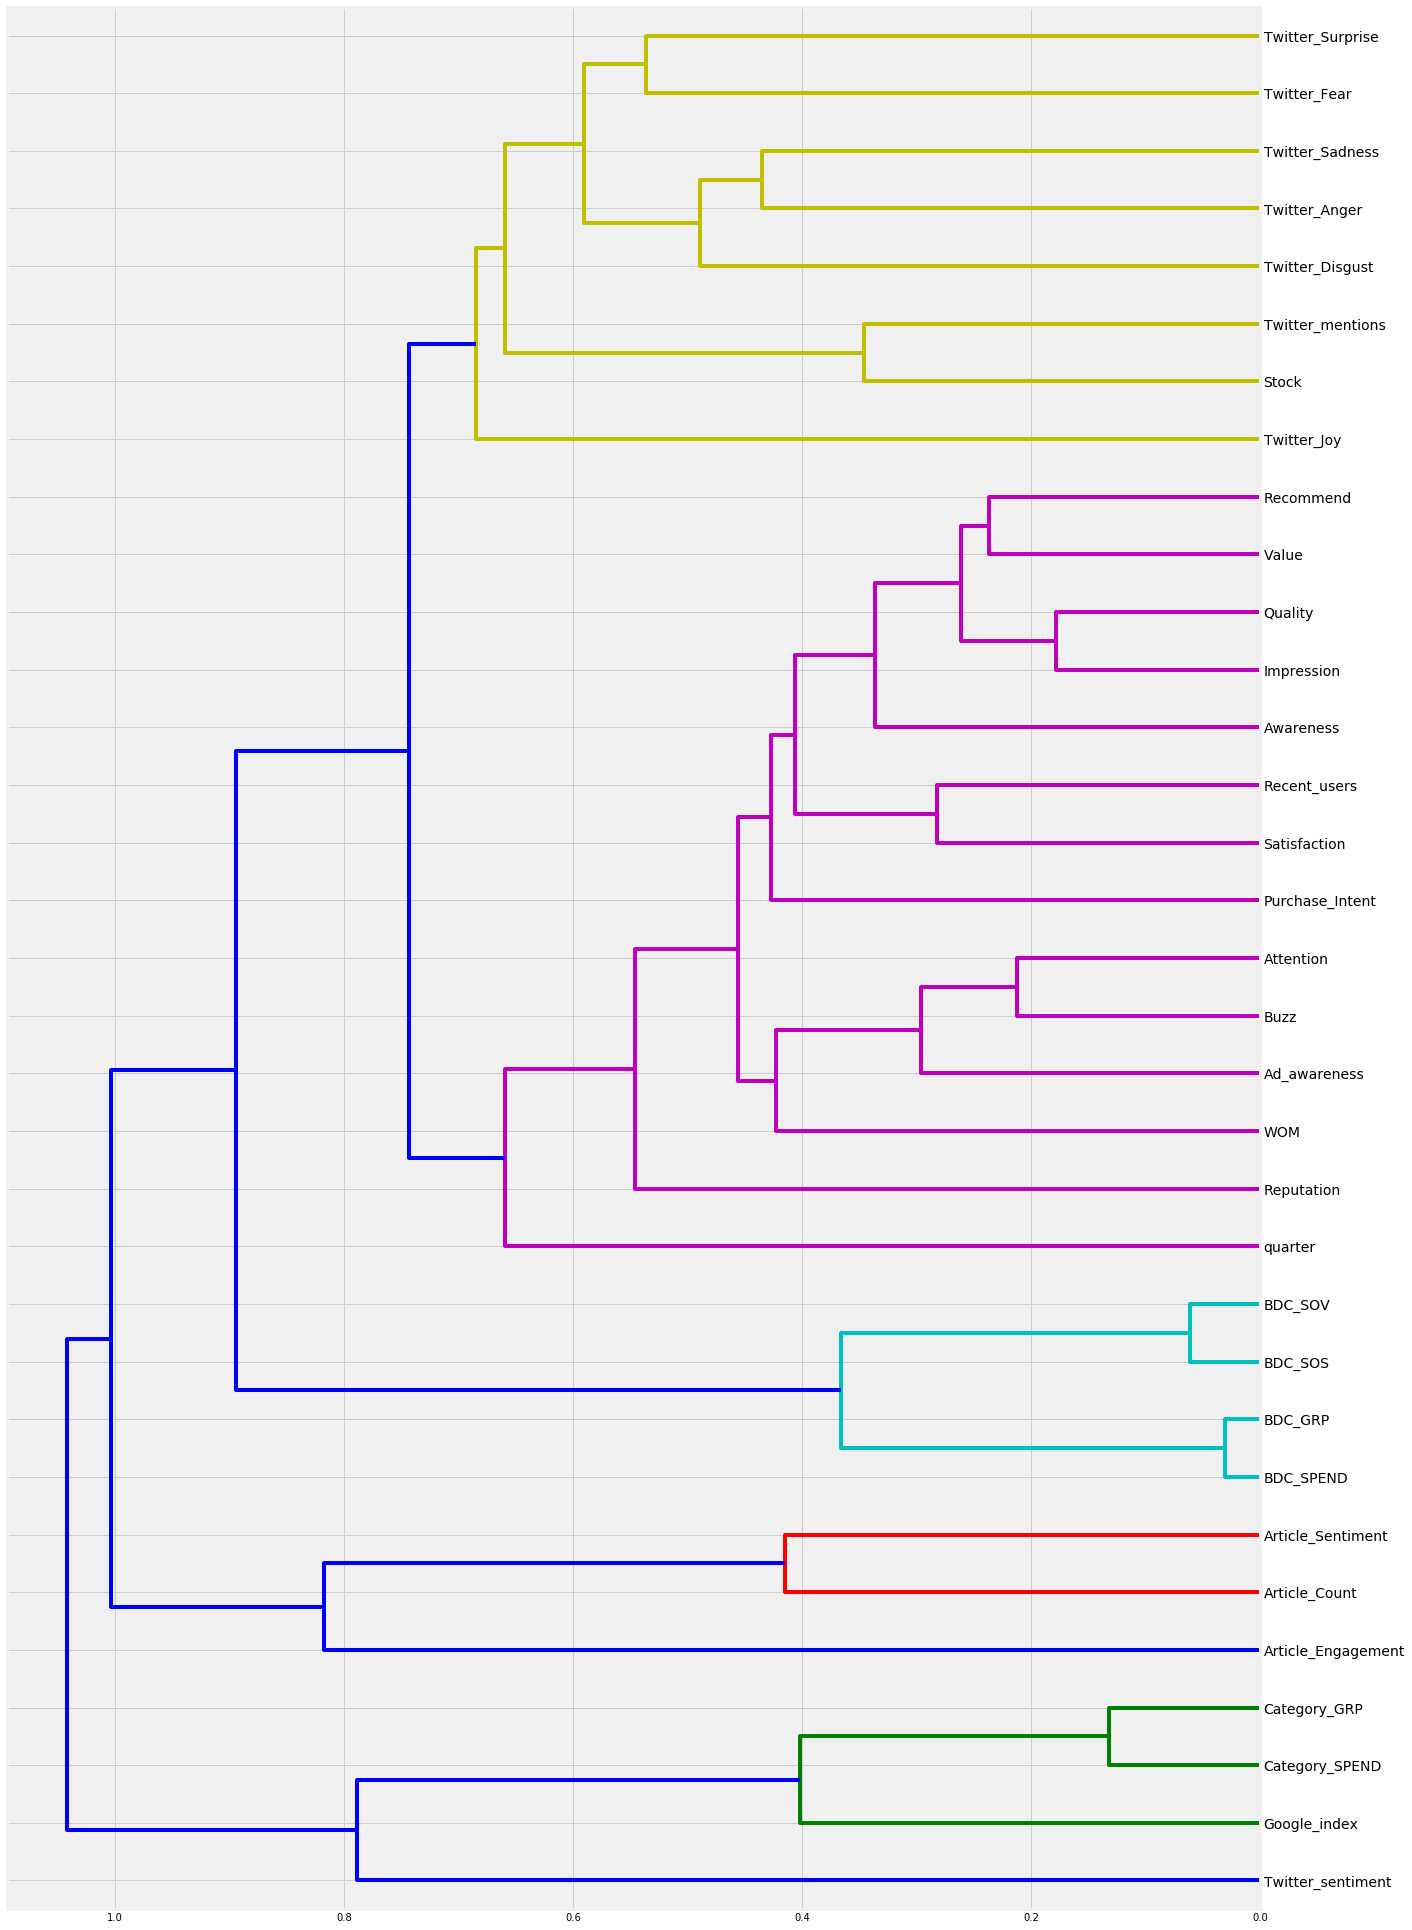

In [70]:
# create the dendrogram
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr as sp
import matplotlib.pyplot as plt
%matplotlib inline

corr = np.round(sp(data_for_cluster).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,35))
dendrogram = hc.dendrogram(z, labels=vals_to_keep, orientation='left', leaf_font_size=14)
plt.show()

In [83]:
df_clean = df.drop(['Twitter_Surprise','Twitter_Fear','quarter', 'Recent_users', 'BDC_SOS', 'Category_SPEND', 'BDC_GRP','Twitter_Joy','Twitter_Sadness', 'Quality', 'Buzz'], axis = 1)

In [84]:
df_clean.head()

Stock  Category_GRP  BDC_SPEND  BDC_SOV  Google_index  \
Week                                                                  
2017-01-01 1476.910           389          0    0.000            57   
2017-01-08 1518.000           612          0    0.000            54   
2017-01-15 1544.000           694          0    0.000            56   
2017-01-22 1541.470           604          0    0.000            54   
2017-01-29 1598.650           655          0    0.000            56   

            Twitter_mentions  Twitter_sentiment  Twitter_Anger  \
Week                                                             
2017-01-01               529             -0.729             94   
2017-01-08               594              0.963             88   
2017-01-15               653              3.597            100   
2017-01-22               597              1.554            107   
2017-01-29               536              2.107             71   

            Twitter_Disgust  Attention  ...  Recommend  Awareness  \
Week                                    ...                         
2017-01-01               15      2.697  ...      8.816     39.680   
2017-01-08                5      3.675  ...      7.895     40.613   
2017-01-15                7      3.348  ...      3.719     38.418   
2017-01-22                8      5.684  ...      9.131     39.424   
2017-01-29                9      4.418  ...      7.275     39.289   

            Ad_awareness   WOM  Consideration  Purchase_Intent  Article_Count  \
Week                                                                            
2017-01-01         4.842 1.389          8.801            2.395             89   
2017-01-08         5.723 1.696          8.860            2.461             70   
2017-01-15         5.294 1.333          9.254            0.845             69   
2017-01-22         5.722 2.334         11.312            2.813             69   
2017-01-29         5.404 3.405          9.966            2.224              4   

            Article_Engagement  Article_Sentiment  month  
Week                                                      
2017-01-01               4.718              4.235      1  
2017-01-08               0.000              4.869      1  
2017-01-15               4.812              7.945      1  
2017-01-22               5.935              6.864      1  
2017-01-29               0.693              4.340      1  

[5 rows x 24 columns]

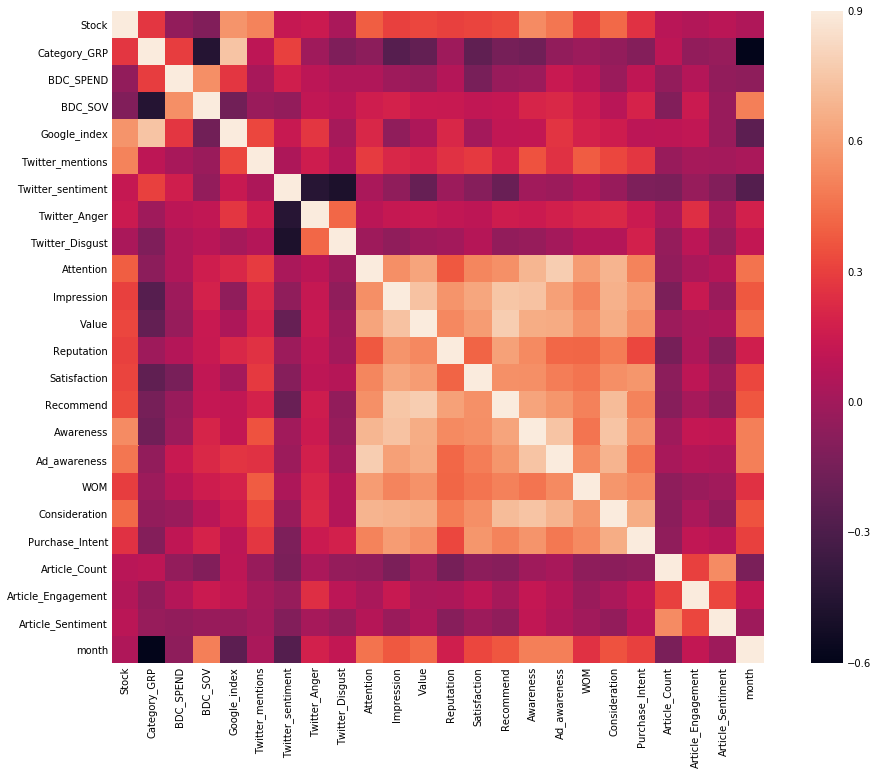

In [85]:
corrmat = df_clean.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Training and Test Sets

In [87]:
# create x and y columns
X = df_clean.loc[:, df_clean.columns != 'Consideration']
y = df_clean['Consideration']

In [88]:
X_std = (X - X.mean()) / X.std()

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=17)

In [91]:
X_train.describe()

Stock  Category_GRP  BDC_SPEND  BDC_SOV  Google_index  \
count 83.000        83.000     83.000   83.000        83.000   
mean   0.009         0.010      0.029   -0.014         0.019   
std    1.011         0.978      1.052    0.994         1.004   
min   -2.577        -2.437     -1.380   -2.074        -1.794   
25%   -0.589        -0.510     -0.629   -0.743        -0.681   
50%    0.024         0.099     -0.348   -0.172         0.135   
75%    0.749         0.617      0.194    0.589         0.765   
max    1.988         1.958      4.034    3.632         1.841   

       Twitter_mentions  Twitter_sentiment  Twitter_Anger  Twitter_Disgust  \
count            83.000             83.000         83.000           83.000   
mean              0.012             -0.025          0.033            0.031   
std               1.042              1.043          1.097            1.108   
min              -0.658             -3.931         -0.852           -0.404   
25%              -0.549             -0.138         -0.511           -0.269   
50%              -0.473              0.334         -0.316           -0.209   
75%               0.315              0.607          0.161           -0.067   
max               5.262              1.161          6.587            7.763   

       Attention  ...  Satisfaction  Recommend  Awareness  Ad_awareness  \
count     83.000  ...        83.000     83.000     83.000        83.000   
mean       0.087  ...         0.054      0.054      0.020         0.084   
std        1.020  ...         0.980      1.002      0.991         0.984   
min       -2.489  ...        -2.459     -2.789     -2.355        -2.622   
25%       -0.537  ...        -0.479     -0.622     -0.570        -0.343   
50%        0.156  ...         0.018     -0.016      0.096         0.228   
75%        0.779  ...         0.660      0.895      0.717         0.640   
max        2.327  ...         2.006      2.339      2.111         2.820   

         WOM  Purchase_Intent  Article_Count  Article_Engagement  \
count 83.000           83.000         83.000              83.000   
mean   0.038            0.013          0.026              -0.006   
std    1.049            1.043          1.110               1.042   
min   -2.020           -2.588         -0.460              -1.888   
25%   -0.615           -0.682         -0.377              -0.482   
50%    0.068           -0.063         -0.116              -0.093   
75%    0.757            0.540          0.095               0.362   
max    3.114            2.711          9.644               2.934   

       Article_Sentiment  month  
count             83.000 83.000  
mean              -0.033 -0.066  
std                1.018  1.021  
min               -1.680 -1.593  
25%               -0.632 -1.016  
50%               -0.248 -0.150  
75%                0.444  0.716  
max                3.898  1.582  

[8 rows x 23 columns]

# Modeling

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import svm
from lightgbm import LGBMRegressor
random_forest = RandomForestRegressor()

### Random Forest

In [114]:
random_forest = RandomForestRegressor()

In [115]:
# set up the parameters of the model you'd like to fit
param_grid = {
    'min_samples_leaf': [1,3,5],
    'n_estimators'      : [75, 100, 150, 200],
    'max_features'      : [0.1, 0.25, 0.5, 'sqrt', 'log2']
}

In [116]:
grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=10)

In [100]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [0.1, 0.25, 0.

In [101]:
grid.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 75}

In [102]:
random_forest.set_params(min_samples_leaf=1, n_estimators=75, max_features='sqrt')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [131]:
random_forest.fit(X_train, y_train)
score = random_forest.score(X_train, y_train)

score

0.9163896073065204

In [106]:
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': random_forest.feature_importances_
})

importances.sort_values(by=['Importance'],ascending=False)

Features  Importance
10          Impression       0.122
14           Recommend       0.104
9            Attention       0.103
15           Awareness       0.084
16        Ad_awareness       0.084
17                 WOM       0.073
18     Purchase_Intent       0.057
13        Satisfaction       0.056
11               Value       0.050
5     Twitter_mentions       0.037
0                Stock       0.027
7        Twitter_Anger       0.024
2            BDC_SPEND       0.023
8      Twitter_Disgust       0.022
20  Article_Engagement       0.020
12          Reputation       0.019
6    Twitter_sentiment       0.017
3              BDC_SOV       0.016
19       Article_Count       0.015
1         Category_GRP       0.014
4         Google_index       0.012
21   Article_Sentiment       0.011
22               month       0.010

### Validation Function

In [117]:
n_folds = 10

In [129]:
#Validation function
#shuffle the dataset prior to cross-validation
n_folds = 10

def score_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    score= (cross_val_score(model, X_train.values, y_train, scoring='r2', cv = kf))
    return(score)

### All Models

In [166]:
#Random Forest
#see above for params
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=1, n_estimators=75, max_features='sqrt')
score = score_cv(forest)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.43066446227364164  score std:  0.19632895113209795


In [492]:
#LASSO Regression

lasso = Lasso(alpha =0.05, random_state=17)
score = score_cv(lasso)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.46934414401594643  score std:  0.18297283930762093


In [490]:
#Ridge Regression

from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 11)
score = score_cv(ridge)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.4545813866139408  score std:  0.18912796516708566


In [163]:
#Elastic Net Regression: 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
ENet = ElasticNet(alpha=0.18, l1_ratio=.9, random_state=17)
score = score_cv(ENet)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.490982460989983  score std:  0.16787341091403316


In [143]:
#Gradient Boosting Regression:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html 
GBoost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='ls', random_state =5)
score = score_cv(GBoost)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.35844299911447164  score std:  0.2237503767911894


In [167]:
#XGBoost:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = score_cv(model_xgb)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.3270770559093253  score std:  0.23290269202022232


In [179]:
#KNN 

knn = KNeighborsRegressor(n_neighbors = 13)
score = score_cv(knn)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.3653003776084578  score std:  0.21618467655582893


In [181]:
#Support Vector Regression

support_vec = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

score = score_cv(support_vec)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.31170310776160026  score std:  0.19300392262714763


In [183]:
#Light GBM Regressor

model_lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=5,
                                       learning_rate=0.05, 
                                       n_estimators=720,
                                       max_bin=55, 
                                       bagging_fraction=0.8,
                                       bagging_freq=5, 
                                       bagging_seed=9,
                                       feature_fraction=0.2319,
                                       feature_fraction_seed=9,
                                       verbose=-1,
                                       min_data_in_leaf=6,
                                       min_sum_hessian_in_leaf=11
                                       )

score = score_cv(model_lgbm)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.30504852279835554  score std:  0.38939078355043777


### Average Base Models

In [184]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [185]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_xgb, ridge, forest))

score = score_cv(averaged_models)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.46162635467116697  score std:  0.1872727385008117


### Stacking Averaged Models

In [186]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [493]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_xgb, ridge, forest),
                                                 meta_model = lasso)

score = score_cv(stacked_averaged_models)
print("score mean: ",score.mean()," score std: ", score.std())

score mean:  0.4602015601547261  score std:  0.1918095991364236


# Train & Predict Consideration Model

In [494]:
from sklearn.metrics import r2_score

def r2(y, y_pred):
    return r2_score(y, y_pred)

In [495]:
stacked_averaged_models.fit(X_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_test.values)

In [496]:
print(r2(y_test, stacked_train_pred))

0.7016095534823739


# ARIMA / SARIMA


In [227]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [305]:
url = 'C:/Users/James.Kelly/OneDrive - insidemedia.net/Documents/consideration.csv'
df_con = pd.read_csv(url, index_col='week', parse_dates=True)
df_con.tail()

consideration
week                     
2019-07-28         15.530
2019-08-04         16.360
2019-08-11         16.080
2019-08-18         16.430
2019-08-25         17.480

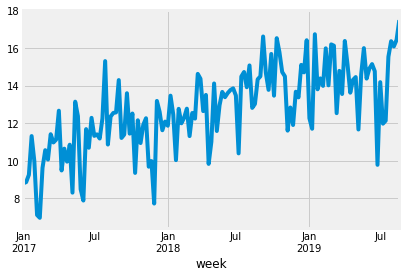

In [467]:
series.plot()

In [306]:
series = df_con.consideration

In [307]:
#dataparse = lambda dates: pd.datetime. strptime(dates, '%Y-%m')
percent_training = .8
split_point = round(len(series)*percent_training)
training, testing = series[0:split_point], series[split_point:]

In [308]:
training = np.log(training)

In [363]:
training_diff = training.diff(periods=20)[20:]

In [ ]:
12

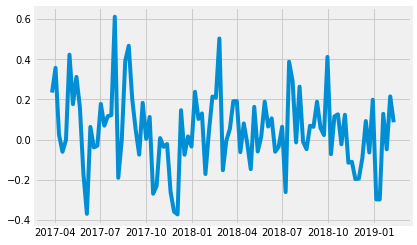

In [389]:
n = 12
training_diff = training.diff(periods=n)[n:]
plt.plot(training_diff)

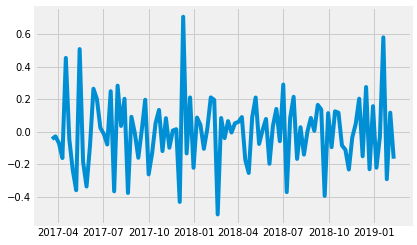

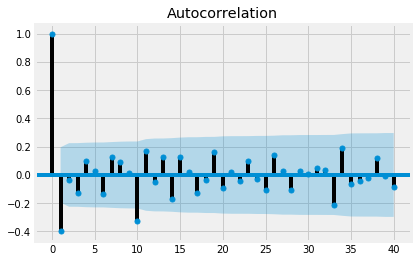

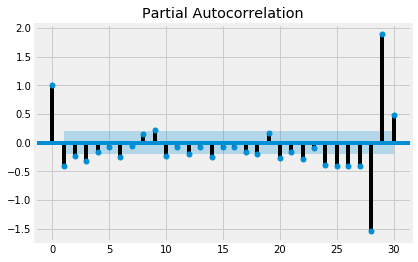

In [444]:
n = 10
i = n+1

training_diff = training.diff().diff(periods=n)[i:]
plt.plot(training_diff)
x = plot_acf(training_diff, lags=40)
y = plot_pacf(training_diff, lags=30)

In [430]:
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(3, 1, 2))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.consideration   No. Observations:                  138
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -254.309
Method:                       css-mle   S.D. of innovations              1.491
Date:                Wed, 28 Aug 2019   AIC                            522.619
Time:                        10:10:06   BIC                            543.109
Sample:                    01-08-2017   HQIC                           530.946
                         - 08-25-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0395      0.004      9.133      0.000       0.031       0.048
ar.L1.D.consideration    -0.7712      0.085     -9.025      0.000      -0.939      -0.604
ar.L2.D.

In [481]:
mod = SARIMAX(series, order=(2, 1, 1), seasonal_order=(0, 1, 1, 10), enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      consideration   No. Observations:                  139
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 10)   Log Likelihood                -222.689
Date:                            Wed, 28 Aug 2019   AIC                            455.378
Time:                                    10:30:30   BIC                            469.146
Sample:                                01-01-2017   HQIC                           460.967
                                     - 08-25-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1590      0.112      1.414      0.157      -0.061       0.379
ar.L2          0.1329      0.101   

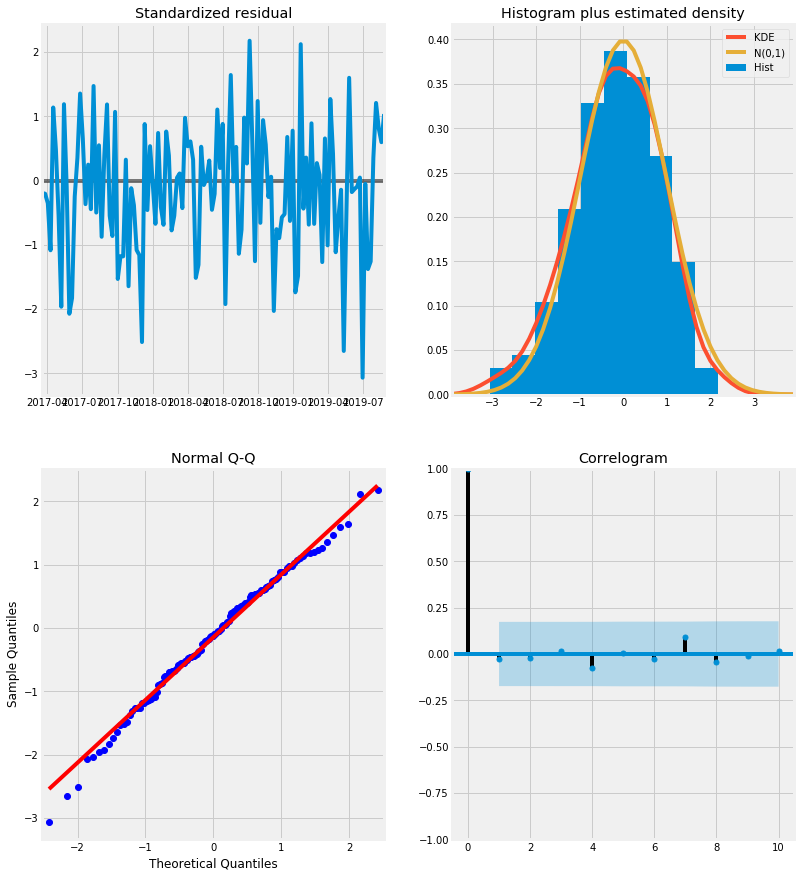

In [458]:
x = results.plot_diagnostics(figsize=(12, 15))

In [482]:
model_fit = mod.fit(disp=False)

K = len(testing)
forecast = model_fit.forecast(K)
forecast = np.exp(forecast)
#series2 = np.exp(series)

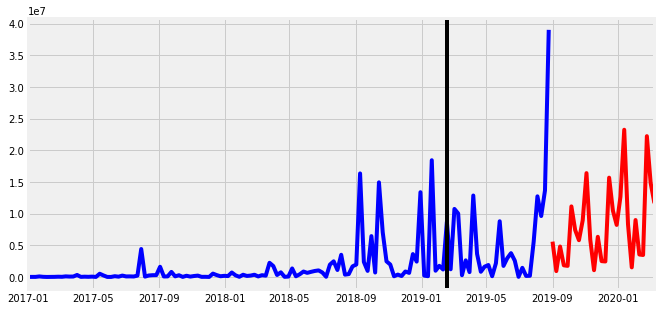

In [483]:
plt.figure(figsize=(10,5))
plt.plot(forecast, 'r')
plt.plot(series2, 'b')
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

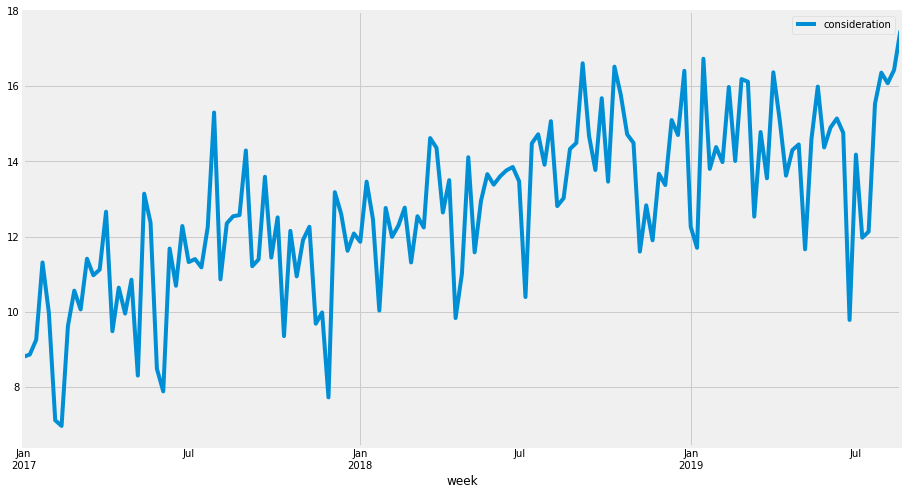

In [210]:
df_con.plot(figsize=(14, 8));

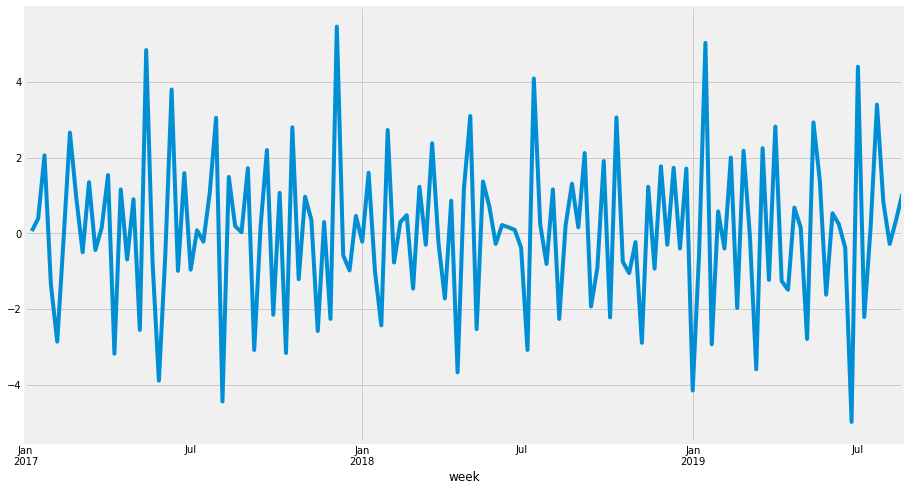

In [212]:
df_con['consideration'].diff().plot(figsize=(14, 8));

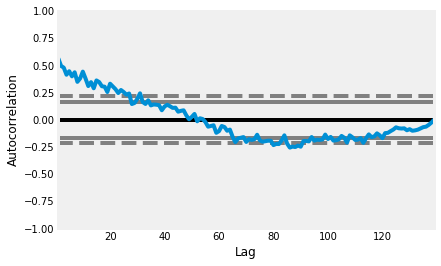

In [222]:
autocorrelation_plot(df_con['consideration']);

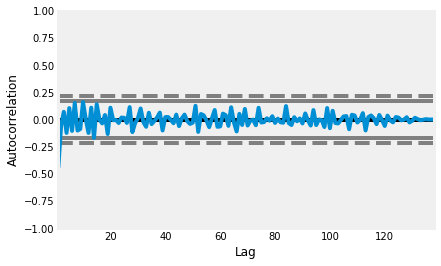

In [213]:
autocorrelation_plot(df_con['consideration'].diff()[1:]);

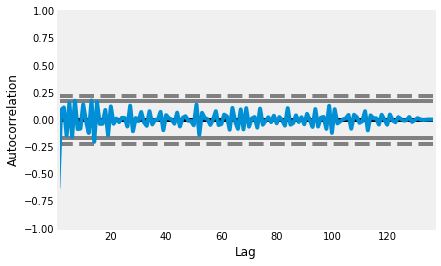

In [248]:
autocorrelation_plot(df_con['consideration'].diff().diff(periods=1)[2:]);

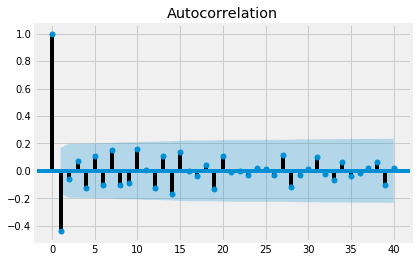

In [228]:
#q=1

stationary_data = df_con['consideration'].diff()[1:]
x = plot_acf(stationary_data, lags=40)

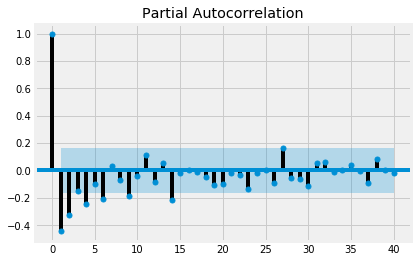

In [229]:
#p = 6
y = plot_pacf(stationary_data, lags=40)

In [ ]:
#taking the log

In [249]:
df_con['LogCon'] = np.log(df_con.consideration)

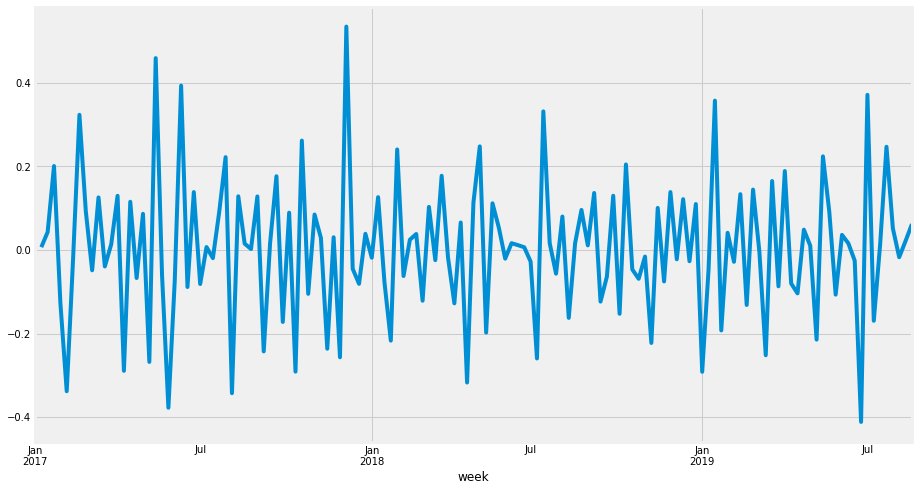

In [253]:
df_con['LogCon'].diff().plot(figsize=(14, 8));

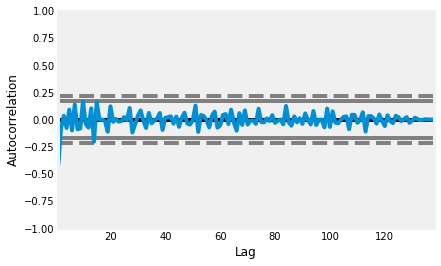

In [265]:
autocorrelation_plot(df_con['LogCon'].diff()[1:]);

In [ ]:
model = ARIMA(df['consideration'], order=(2, 1, 1))
results = model.fit()
print(results.summary())

In [ ]:
results.forecast(steps=3)

In [ ]:
results.aic

In [ ]:
mod = SARIMAX(data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results = mod.fit()
print(results.summary())

In [ ]:
x = results.plot_diagnostics(figsize=(12, 15))